In [20]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

import math

import plotly as  py
py.offline.init_notebook_mode(connected=True)

import plotly.express as px 
import plotly.graph_objs as go

import pandas as pd
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])


feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)


In [22]:
fig = go.Figure()

fig.add_trace(go.Scattergl(
    x = cat_images[:,0],
    y = cat_images[:,1],
    mode='markers',
    name = 'Cat',
    marker=dict(
        color=labels[0],
        colorscale='Viridis'
    )
))

fig.add_trace(go.Scattergl(
    x = mouse_images[:,0],
    y = mouse_images[:,1],
    mode='markers',
    name = 'Mouse',
    marker=dict(
        color=labels[1],
        colorscale='Viridis'
    )
))


fig.add_trace(go.Scattergl(
    x = dog_images[:,0],
    y = dog_images[:,1],
    mode='markers',
    name = 'Dog',
    marker=dict(
        color=labels[2],
        colorscale='Viridis'
    )
))



fig.show()

In [23]:
train_data,test_data,train_labels,test_labels=train_test_split(feature_set,labels,test_size=0.3)

one_hot_labels = np.zeros((1470, 3))

for i in range(1470):
    one_hot_labels[i, train_labels[i]] = 1

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [25]:
instances = train_data.shape[0]
attributes = train_data.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes, hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes, output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

In [29]:
for epoch in range(2000):
    ######### feedforward

    # Phase 1
    zh = np.dot(train_data, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

    ########## Back Propagation

    ########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

    ########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo, dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = train_data
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        # print('Loss function value: ', loss)
        error_cost.append(loss)

        
fig = px.line(error_cost)
fig.show()        

Train data report



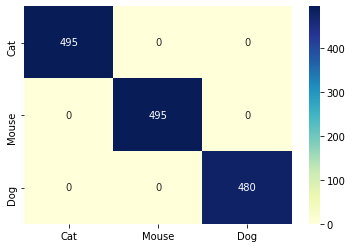

Accurecy
--------------------------
1.0

Classification report
--------------------------
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00       495
       Mouse       1.00      1.00      1.00       495
         Dog       1.00      1.00      1.00       480

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [30]:
print("Train data report")
print("===================================")
print()


fig = go.Figure()

x_train_data = train_data[:,0]
y_train_data  = train_data[:,1]
z_train_data  = ao

temp_z_train_data = np.zeros((z_train_data.shape[0]))

index = 0
for r in z_train_data:
    temp_z_train_data[index] = r.argmax()
    index = index + 1
    
z_train_data = temp_z_train_data 



cat_images_train = []
mouse_images_train = []
dog_images_train = []


color_cat_train_data = []
color_mouse_train_data = []
color_dog_train_data = []

z_index_at_cat_train_point = []
z_index_at_mouse_train_point = []
z_index_at_dog_train_point = []



for r in range(train_data.shape[0]):
    if train_labels[r]== 0 :
        cat_images_train.append(train_data[r])
        color_cat_train_data.append('red')
        z_index_at_cat_train_point.append(ao[r].max())          
    elif train_labels[r]== 1 :   
        mouse_images_train.append(train_data[r])
        color_mouse_train_data.append('#1B5E20')
        z_index_at_mouse_train_point.append(ao[r].max())
    elif train_labels[r]== 2 : 
        dog_images_train.append(train_data[r])
        color_dog_train_data.append('#0D47A1')
        z_index_at_dog_train_point.append(ao[r].max())
        
        
        
        
        
        
        
fig.add_trace(go.Scatter3d(x=np.array(cat_images_train)[:,0],
                           y=np.array(cat_images_train)[:,1],
                           z=z_index_at_cat_train_point, 
                           name = 'Cat',
                           mode='markers',
                           marker=dict(
                                   size=3,
                                   color=color_cat_train_data,
                                   colorscale='Viridis'
                                   )
                          ))


fig.add_trace(go.Scatter3d(x=np.array(mouse_images_train)[:,0],
                           y=np.array(mouse_images_train)[:,1],
                           z=z_index_at_mouse_train_point,
                           name = 'Mouse',
                           mode='markers',
                           marker=dict(
                                   size=3,
                                   color=color_mouse_train_data,
                                   colorscale='Viridis'
                                   )
                          ))



fig.add_trace(go.Scatter3d(x=np.array(dog_images_train)[:,0],
                           y=np.array(dog_images_train)[:,1],
                           z=z_index_at_dog_train_point,
                           name = 'Dog',
                           mode='markers',
                           marker=dict(
                                   size=3,
                                   color=color_dog_train_data,
                                   colorscale='Viridis'
                                   )
                          ))

##########################################################################################

x_train_data_line = np.linspace(np.array(cat_images_train).min(axis=0)[0], np.array(cat_images_train).max(axis=0)[0], 50)
y_train_data_line = np.linspace(np.array(cat_images_train).min(axis=0)[1], np.array(cat_images_train).max(axis=0)[1], 50)

X_train_data_line, Y_train_data_line = np.meshgrid(x_train_data_line, y_train_data_line)
train_line_data = np.transpose([X_train_data_line.flatten(),Y_train_data_line.flatten()])


zh_train_data_line = np.dot(train_line_data, wh) + bh
ah_train_data_line = sigmoid(zh_train_data_line)

zo_train_data_line = np.dot(ah_train_data_line, wo) + bo
ao_train_data_line = softmax(zo_train_data_line)

z_train_data_line = ao_train_data_line


tmp_z_train_data_line = []

for r in z_train_data_line:
    tmp_z_train_data_line.append(r.max())


z_train_data_line = np.array(tmp_z_train_data_line)

Z_train_data_line = z_train_data_line.reshape(X_train_data_line.shape)



Cat_X_train_data_line = X_train_data_line
Cat_Y_train_data_line = Y_train_data_line
Cat_Z_train_data_line = Z_train_data_line

colorscale = [[0, '#f44336'], 
              [1, '#f44336']]
colors_surface1 = np.zeros(shape=Z_train_data_line.shape)  


fig.add_trace(go.Surface(z=Cat_Z_train_data_line, x=Cat_X_train_data_line, y=Cat_Y_train_data_line,surfacecolor=colors_surface1,opacity=.4,cmin=0,cmax=1,colorscale=colorscale,name='Cat boundary',showscale = False))


x_train_data_line = np.linspace(np.array(mouse_images_train).min(axis=0)[0], np.array(mouse_images_train).max(axis=0)[0], 50)
y_train_data_line = np.linspace(np.array(mouse_images_train).min(axis=0)[1], np.array(mouse_images_train).max(axis=0)[1], 50)

X_train_data_line, Y_train_data_line = np.meshgrid(x_train_data_line, y_train_data_line)
train_line_data = np.transpose([X_train_data_line.flatten(),Y_train_data_line.flatten()])


zh_train_data_line = np.dot(train_line_data, wh) + bh
ah_train_data_line = sigmoid(zh_train_data_line)

zo_train_data_line = np.dot(ah_train_data_line, wo) + bo
ao_train_data_line = softmax(zo_train_data_line)

z_train_data_line = ao_train_data_line


tmp_z_train_data_line = []

for r in z_train_data_line:
    tmp_z_train_data_line.append(r.max())


z_train_data_line = np.array(tmp_z_train_data_line)

Z_train_data_line = z_train_data_line.reshape(X_train_data_line.shape)



Mouse_X_train_data_line = X_train_data_line
Mouse_Y_train_data_line = Y_train_data_line
Mouse_Z_train_data_line = Z_train_data_line

colorscale = [[0, '#4CAF50'],
              [1, '#4CAF50']]
colors_surface1 = np.zeros(shape=Z_train_data_line.shape)


fig.add_trace(go.Surface(z=Mouse_Z_train_data_line, x=Mouse_X_train_data_line, y=Mouse_Y_train_data_line,surfacecolor=colors_surface1,opacity=.4,cmin=0,cmax=1,colorscale=colorscale,name='Mouse boundary',showscale = False))




x_train_data_line = np.linspace(np.array(dog_images_train).min(axis=0)[0], np.array(dog_images_train).max(axis=0)[0], 50)
y_train_data_line = np.linspace(np.array(dog_images_train).min(axis=0)[1], np.array(dog_images_train).max(axis=0)[1], 50)

X_train_data_line, Y_train_data_line = np.meshgrid(x_train_data_line, y_train_data_line)
train_line_data = np.transpose([X_train_data_line.flatten(),Y_train_data_line.flatten()])


zh_train_data_line = np.dot(train_line_data, wh) + bh
ah_train_data_line = sigmoid(zh_train_data_line)

zo_train_data_line = np.dot(ah_train_data_line, wo) + bo
ao_train_data_line = softmax(zo_train_data_line)

z_train_data_line = ao_train_data_line


tmp_z_train_data_line = []

for r in z_train_data_line:
    tmp_z_train_data_line.append(r.max())


z_train_data_line = np.array(tmp_z_train_data_line)

Z_train_data_line = z_train_data_line.reshape(X_train_data_line.shape)



Dog_X_train_data_line = X_train_data_line
Dog_Y_train_data_line = Y_train_data_line
Dog_Z_train_data_line = Z_train_data_line

colorscale = [[0, '#2196F3'],
              [1, '#2196F3']]
colors_surface1 = np.zeros(shape=Z_train_data_line.shape)


fig.add_trace(go.Surface(z=Dog_Z_train_data_line, x=Dog_X_train_data_line, y=Dog_Y_train_data_line,surfacecolor=colors_surface1,opacity=.4,cmin=0,cmax=1,colorscale=colorscale,name='Dog boundary',showscale = False))


class_names = ['Cat','Mouse','Dog']
predict_train =  z_train_data

# confusion matrix

cm = confusion_matrix(train_labels, predict_train)

array = cm.tolist()
df_cm = pd.DataFrame(array, index = [i for i in class_names],
                  columns = [i for i in class_names])

sns.heatmap(df_cm, cmap="YlGnBu",annot=True, fmt="d")
plt.show()

print("Accurecy")
print("--------------------------")
print(accuracy_score(train_labels, predict_train))
print()

print("Classification report")
print("--------------------------")
print(classification_report(train_labels, predict_train, target_names=class_names))




fig.update_layout(
    autosize=True,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
    
)


fig.show()


Test data report



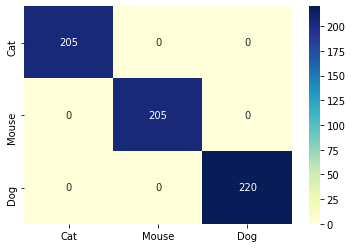

Accurecy
--------------------------
1.0

Classification report
--------------------------
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00       205
       Mouse       1.00      1.00      1.00       205
         Dog       1.00      1.00      1.00       220

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



In [31]:
print("Test data report")
print("===================================")
print()

fig = go.Figure()

cat_images_test_predicted = []
mouse_images_test_predicted = []
dog_images_test_predicted = []


x_test_data = test_data[:, 0]
y_test_data = test_data[:, 1]

zh_test_data = np.dot(test_data, wh) + bh
ah_test_data = sigmoid(zh_test_data)

# Phase 2
zo_test_data = np.dot(ah_test_data, wo) + bo
ao_test_data = softmax(zo_test_data)



z_test_data = ao_test_data

temp_z_test_data = np.zeros((z_test_data.shape[0]))

index = 0
for r in z_test_data:
    temp_z_test_data[index] = r.argmax()
    if(r.argmax()==0):
        cat_images_test_predicted.append(test_data[index])
    elif(r.argmax()==1):
        mouse_images_test_predicted.append(test_data[index])
    elif(r.argmax()==2):
        dog_images_test_predicted.append(test_data[index])
    index = index + 1

z_test_data = temp_z_test_data

cat_images_test = []
mouse_images_test = []
dog_images_test = []

color_cat_test_data = []
color_mouse_test_data = []
color_dog_test_data = []

z_index_at_cat_test_point = []
z_index_at_mouse_test_point = []
z_index_at_dog_test_point = []

for r in range(test_data.shape[0]):
    if test_labels[r] == 0:
        cat_images_test.append(test_data[r])
        color_cat_test_data.append('red')
        z_index_at_cat_test_point.append(ao[r].max())
    elif test_labels[r] == 1:
        mouse_images_test.append(test_data[r])
        color_mouse_test_data.append('#1B5E20')
        z_index_at_mouse_test_point.append(ao[r].max())
    elif test_labels[r] == 2:
        dog_images_test.append(test_data[r])
        color_dog_test_data.append('#0D47A1')
        z_index_at_dog_test_point.append(ao[r].max())

fig.add_trace(go.Scatter3d(x=np.array(cat_images_test)[:, 0],
                           y=np.array(cat_images_test)[:, 1],
                           z=z_index_at_cat_test_point,
                           name='Cat',
                           mode='markers',
                           marker=dict(
                               size=3,
                               color=color_cat_test_data,
                               colorscale='Viridis'
                           )
                           ))

fig.add_trace(go.Scatter3d(x=np.array(mouse_images_test)[:, 0],
                           y=np.array(mouse_images_test)[:, 1],
                           z=z_index_at_mouse_test_point,
                           name='Mouse',
                           mode='markers',
                           marker=dict(
                               size=3,
                               color=color_mouse_test_data,
                               colorscale='Viridis'
                           )
                           ))

fig.add_trace(go.Scatter3d(x=np.array(dog_images_test)[:, 0],
                           y=np.array(dog_images_test)[:, 1],
                           z=z_index_at_dog_test_point,
                           name='Dog',
                           mode='markers',
                           marker=dict(
                               size=3,
                               color=color_dog_test_data,
                               colorscale='Viridis'
                           )
                           ))



###############################################################################################

x_test_data_line = np.linspace(np.array(cat_images_test_predicted).min(axis=0)[0], np.array(cat_images_test_predicted).max(axis=0)[0],
                                50)
y_test_data_line = np.linspace(np.array(cat_images_test_predicted).min(axis=0)[1], np.array(cat_images_test_predicted).max(axis=0)[1],
                                50)
    

X_test_data_line, Y_test_data_line = np.meshgrid(x_test_data_line, y_test_data_line)
test_line_data = np.transpose([X_test_data_line.flatten(), Y_test_data_line.flatten()])

zh_test_data_line = np.dot(test_line_data, wh) + bh
ah_test_data_line = sigmoid(zh_test_data_line)

zo_test_data_line = np.dot(ah_test_data_line, wo) + bo
ao_test_data_line = softmax(zo_test_data_line)

z_test_data_line = ao_test_data_line

tmp_z_test_data_line = []

for r in z_test_data_line:
    tmp_z_test_data_line.append(r.max())

z_test_data_line = np.array(tmp_z_test_data_line)

Z_test_data_line = z_test_data_line.reshape(X_test_data_line.shape)

Cat_X_test_data_line = X_test_data_line
Cat_Y_test_data_line = Y_test_data_line
Cat_Z_test_data_line = Z_test_data_line

colorscale = [[0, '#f44336'],
              [1, '#f44336']]
colors_surface1 = np.zeros(shape=Z_test_data_line.shape)

fig.add_trace(
    go.Surface(z=Cat_Z_test_data_line, x=Cat_X_test_data_line, y=Cat_Y_test_data_line, surfacecolor=colors_surface1,
               opacity=.4, cmin=0, cmax=1, colorscale=colorscale, name='Cat boundary', showscale=False))

x_test_data_line = np.linspace(np.array(mouse_images_test_predicted).min(axis=0)[0],
                                np.array(mouse_images_test_predicted).max(axis=0)[0], 50)
y_test_data_line = np.linspace(np.array(mouse_images_test_predicted).min(axis=0)[1],
                                np.array(mouse_images_test_predicted).max(axis=0)[1], 50)

X_test_data_line, Y_test_data_line = np.meshgrid(x_test_data_line, y_test_data_line)
test_line_data = np.transpose([X_test_data_line.flatten(), Y_test_data_line.flatten()])

zh_test_data_line = np.dot(test_line_data, wh) + bh
ah_test_data_line = sigmoid(zh_test_data_line)

zo_test_data_line = np.dot(ah_test_data_line, wo) + bo
ao_test_data_line = softmax(zo_test_data_line)

z_test_data_line = ao_test_data_line

tmp_z_test_data_line = []

for r in z_test_data_line:
    tmp_z_test_data_line.append(r.max())

z_test_data_line = np.array(tmp_z_test_data_line)

Z_test_data_line = z_test_data_line.reshape(X_test_data_line.shape)

Mouse_X_test_data_line = X_test_data_line
Mouse_Y_test_data_line = Y_test_data_line
Mouse_Z_test_data_line = Z_test_data_line

colorscale = [[0, '#4CAF50'],
              [1, '#4CAF50']]
colors_surface1 = np.zeros(shape=Z_test_data_line.shape)

fig.add_trace(go.Surface(z=Mouse_Z_test_data_line, x=Mouse_X_test_data_line, y=Mouse_Y_test_data_line,
                         surfacecolor=colors_surface1, opacity=.4, cmin=0, cmax=1, colorscale=colorscale,
                         name='Mouse boundary', showscale=False))

x_test_data_line = np.linspace(np.array(dog_images_test_predicted).min(axis=0)[0], np.array(dog_images_test_predicted).max(axis=0)[0],
                                50)
y_test_data_line = np.linspace(np.array(dog_images_test_predicted).min(axis=0)[1], np.array(dog_images_test_predicted).max(axis=0)[1],
                                50)

X_test_data_line, Y_test_data_line = np.meshgrid(x_test_data_line, y_test_data_line)
test_line_data = np.transpose([X_test_data_line.flatten(), Y_test_data_line.flatten()])

zh_test_data_line = np.dot(test_line_data, wh) + bh
ah_test_data_line = sigmoid(zh_test_data_line)

zo_test_data_line = np.dot(ah_test_data_line, wo) + bo
ao_test_data_line = softmax(zo_test_data_line)

z_test_data_line = ao_test_data_line

tmp_z_test_data_line = []

for r in z_test_data_line:
    tmp_z_test_data_line.append(r.max())

z_test_data_line = np.array(tmp_z_test_data_line)

Z_test_data_line = z_test_data_line.reshape(X_test_data_line.shape)

Dog_X_test_data_line = X_test_data_line
Dog_Y_test_data_line = Y_test_data_line
Dog_Z_test_data_line = Z_test_data_line

colorscale = [[0, '#2196F3'],
              [1, '#2196F3']]
colors_surface1 = np.zeros(shape=Z_test_data_line.shape)

fig.add_trace(
    go.Surface(z=Dog_Z_test_data_line, x=Dog_X_test_data_line, y=Dog_Y_test_data_line, surfacecolor=colors_surface1,
               opacity=.4, cmin=0, cmax=1, colorscale=colorscale, name='Dog boundary', showscale=False))

class_names = ['Cat', 'Mouse', 'Dog']
predict_test = z_test_data

# confusion matrix

cm = confusion_matrix(test_labels, predict_test)

array = cm.tolist()
df_cm = pd.DataFrame(array, index=[i for i in class_names],
                     columns=[i for i in class_names])

sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="d")
plt.show()

print("Accurecy")
print("--------------------------")
print(accuracy_score(test_labels, predict_test))
print()

print("Classification report")
print("--------------------------")
print(classification_report(test_labels, predict_test, target_names=class_names))

fig.update_layout(
    autosize=True,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )

)

fig.show()
